<a href="https://colab.research.google.com/github/script000kiddies000/data-sience-with-python/blob/main/Analisis_Data_COVID19_di_Dunia_%26_ASEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div id="theory"><h2>Pendahuluan</h2><p>Covid19 adalah pandemi yang sudah mewabah ke seluruh dunia. Sebagian besar negara-negara di dunia sudah terjangkit. Penanganan tiap-tiap negara pun berbeda, sesuai dengan kebijakan pemerintah. Hal ini mengakibatkan perbedaan trend kenaikan atau penurunan kasus covid berbeda-beda tiap negara.</p>
<p>Pada kasus kali ini, kita akan mencoba menggali data covid19 dari salah satu open api yang tersedia yaitu <a href="https://covid19-api.org/">https://covid19-api.org/</a>.</p>
<p>&nbsp;</p>
<p>&nbsp;</p>


<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Library yang dibutuhkan</h2><p>Pertama-tama, import terlebih dahulu library yang dibutuhkan, antara lain secara berurutan adalah</p>
<ul>
<li>json,</li>
<li>numpy,</li>
<li>pandas, dan</li>
<li>requests.</li>
</ul>
<p>Library numpy dan pandas diimport sebagai aliasnya.</p>
<p>&nbsp;</p>


In [1]:
import json
import numpy as np
import pandas as pd
import requests

<div id="theorycontent"><h2>Membuat Fungsi get API</h2><p>Buat fungsi python <strong>get_json</strong> dengan parameter <strong>api_url</strong>. fungsi ini akan mengembalikan value berupa python dictionary jika <strong>status_code</strong> yang dihasilkan adalah 200. Jika tidak, maka value yang dikembalikan adalah <strong>None</strong>.</p>
<p>&nbsp;</p>
<p>&nbsp;</p>


In [2]:
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

<div id="theorycontent"><h2>Memanggil API Covid19</h2><p>Rekapitulasi data COVID-19 global berada di <a href="https://covid19-api.org/">https://covid19-api.org/</a>. Gunakan parameter record_date untuk mengambil data covid19 di seluruh negara pada tanggal tertentu. Untuk kasus ini, gunakan record_date '2020-08-17', dan masukkan hasil respon api ke variable df_covid_worldwide.</p>
<p>Untuk mendapatkan dataframe covid19, gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json() Print sample data covid dengan menggunakan head() function.</p>


In [3]:
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


<div id="theorycontent"><h2>Merubah Format date</h2><p>Ubah format kolom 'last_update' menggunakan fungsi to_datetime dengan format <strong>YYYY-mm-dd HH:MM:SS</strong>. Lalu ubah bentuk datetime ke bentuk date dengan fungsi date() melalui fungsi lambda untuk mengubah setiap row-nya.</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

In [4]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

<div id="theorycontent"><h2>Mengambil Data Countries</h2><p>Buatlah dataframe countries dengan memanggil variable countries_url ke api covid19-api.org. Lalu ubah nama kolom alpha2 menjadi country, kemudian ambil hanya kolom name dan country saja untuk dataframe countries (df_countries) ini.</p>
<p>Akhirnya cetaklah lima data teratas dari dataframe countries (df_countries).</p>
<p>&nbsp;</p>
<p>&nbsp;</p>


In [5]:


countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


<div id="theorycontent"><h2>Merge Covid19 Data dan Countries</h2><p>Selanjutnya adalah mapping data covid19 dan data country. Gunakan fungsi merge pada pandas untuk menggabungkan df_covid_worldwide dan df_countries. Untuk merge, gunakan kolom country. Lalu print sample data dengan menggunakan head().</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

In [6]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name
0      US  2020-08-16  5401167  170019    1833067  United States of America
1      BR  2020-08-16  3340197  107852    2655017                    Brazil
2      IN  2020-08-16  2589682   49980    1862258                     India
3      RU  2020-08-16   920719   15653     731444        Russian Federation
4      ZA  2020-08-16   587345   11839     472377              South Africa


<div id="theorycontent" ><h2>Menghitung Fatality Ratio</h2><p>Tambahkan satu kolom tambahan yaitu fatality_ratio, yang merupakan pembagian antara kolom deaths dan cases.</p>
<p>&nbsp;</p>
<p>&nbsp;</p>


In [7]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths'] / df_covid_denormalized['cases']

<h2>Negara-negara dengan Fatality Ratio Tertinggi</h2><p>Ambil top 20 negara dengan value kolom fatality_ratio tertinggi dengan menggunakan fungsi sort_values.</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

In [8]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

<h2>Import Library Visualisasi</h2><p>Importlah library matplotlib.pyplot sebagai aliasnya plt.</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

In [9]:
import matplotlib.pyplot as plt

<h2>Visualisasi Negara dengan Fatality Ratio Tertinggi</h2><p>Untuk memvisualisasikan negara-negara dengan kasus fatality rate tertinggi akibat covid-19 ini dapat dilakukan dengan menggunakan bar chart.&nbsp; Di sini tentukan terlebih dahulu isi dari variable x axis dan y axis.</p>
<p>Variabel x axis adalah kolom <strong>name</strong>, dan kolom y atau value nya adalah kolom <strong>fatality_ratio</strong> dan gunakan fungsi plt.bar([value x axis, value y axis]).</p>
<p>Label sumbu x diputar 90 derajat untuk menghindari bertumpuknya nama-nama negara pada posisi 0 derajat.</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

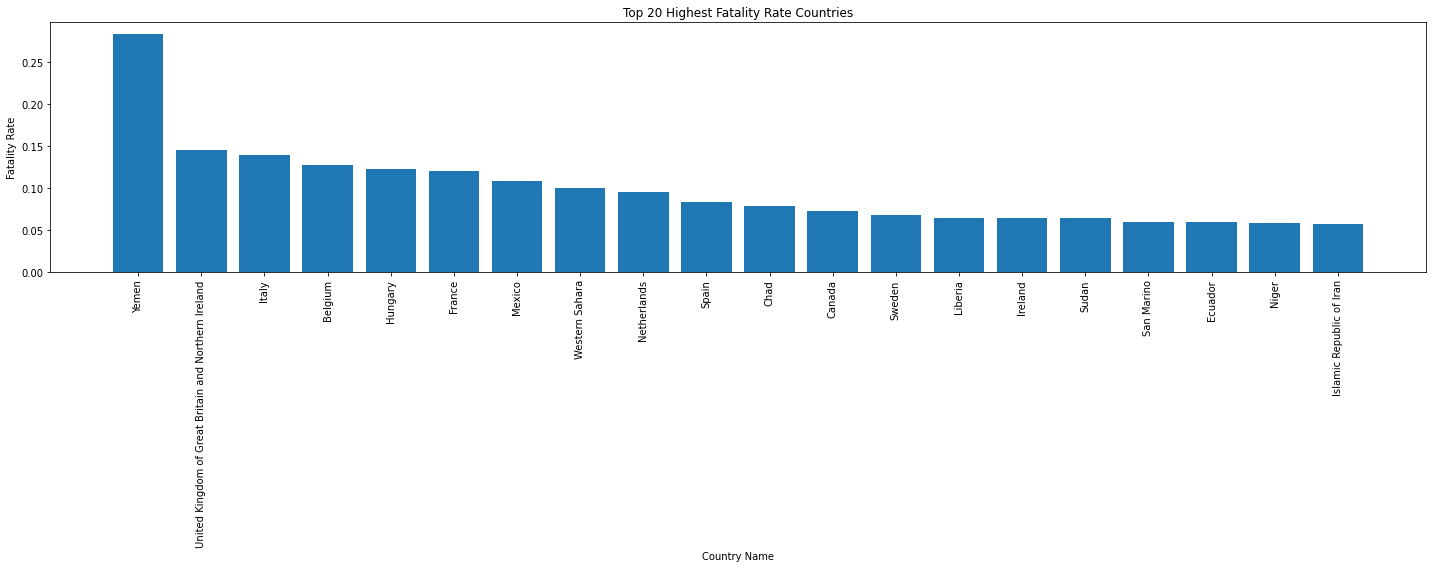

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<div id="theorycontent"><h2>Menggabungkan Dataframe</h2><p>Selanjutnya adalah membandingkan kasus covid19 di Indonesia (ID) dengan negara-negara tetangga, yaitu:</p>
<ul>
<li>MY -&gt; Malaysia,</li>
<li>SG -&gt; Singapure,</li>
<li>TH -&gt; Thailand,</li>
<li>VN -&gt; Vietnam.</li>
</ul>
<p>Untuk itu, api country dipanggil berkali-kali sebanyak negara yang akan kita bandingkan.</p>
<p>Gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json().</p>
<p>Gunakan fungsi datetime untuk merubah string ke bentuk datetime (YYYY-mm-dd HH:MM:SS) yang selanjutnya diubah ke format date.</p>
<p>Cetaklah lima data teratas dari dataframe yang telah dibentuk.</p>
<p>&nbsp;</p>
<p>&nbsp;</p>


In [11]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
  covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
  df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
  df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
  df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
  if i==0:
    df_covid_timeline_merged = df_covid_timeline
  else:
    df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
  i=i+1

print(df_covid_timeline_merged.head())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


  country last_update  cases  deaths  recovered
0      VN  2020-12-07   1366      35       1220
1      VN  2020-12-06   1366      35       1220
2      VN  2020-12-05   1365      35       1220
3      VN  2020-12-04   1361      35       1220
4      VN  2020-12-03   1361      35       1209


<h2>Merge Data Covid19 Dengan Data Country</h2><p>Lalu gabungkan df_covid_timeline_merged dengan df_countries dengan kolom country sebagai pivot.</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

In [12]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

<h2>Kasus Covid-19 di ASEAN pada Bulan Maret 2020</h2><p>Filter kolom last_update dari data covid19 sehingga hanya data dari tanggal 1 Maret 2020 ke atas yangdiambil. Format datetime.date menggunakan format YYYY, mm, dd.</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

In [13]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

<h2>Visualisasi Kasus Covid-19 di ASEAN</h2><p>Buat variable x dan y dimana x adalah tanggal (last_update) pada tiap-tiap negara dan y adalah jumlah kasus (cases) pada tiap-tiap negara. Lalu plot x dan y untuk menggambar line chart.</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

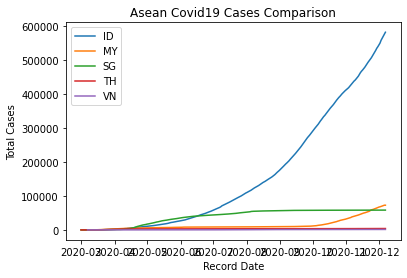

In [14]:


import matplotlib.pyplot as plt
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
  country_data = df_covid_timeline_denormalized['country']==country
  x = df_covid_timeline_denormalized[country_data]['last_update']
  y = df_covid_timeline_denormalized[country_data]['cases']
  plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()